In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from priceanalytics.data import download_df_map, cache_df_map, load_cached_df_map 
from priceanalytics.plot import MultiPlot
from priceanalytics import indicators as I
from priceanalytics.backtest import Backtester

from datetime import datetime, date, time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
import json
    
def load():
    with open("results_sbosc.json", 'r') as f:
        s = f.read()
        return json.loads(s)
    
data = load()

In [4]:
def zipdata(data):
    zl = []
    for _len, submap in data.items():
        for sig_len, tpr in submap.items():
            zl.append((_len, sig_len, tpr))
    return zl

#print(zipped)

def unzip(zipped):
    lens, sig_lens, tprs = np.zeros((3, len(zipped)))
    for i, t in enumerate(zipped):
        lens[i] = t[0]
        sig_lens[i] = t[1]
        tprs[i] = t[2]
    return lens, sig_lens, tprs 



Text(0.5, 0.92, 'returns(_len, sig_len)')

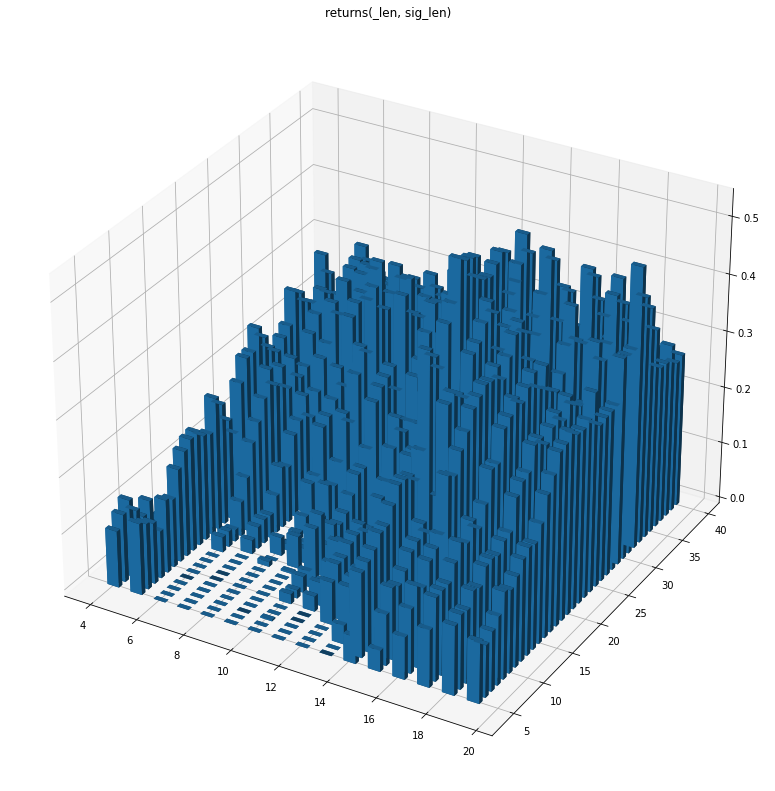

In [17]:
zipped = zipdata(data)
lens, sig_lens, tprs = unzip(zipped)

fig = plt.figure(figsize=(30, 30))
ax1 = fig.add_subplot(121, projection='3d')

bot = np.zeros_like(tprs)
for i, _ in enumerate(tprs):
    if _ < 0:
        tprs[i] = 0
        

width = .5
depth = .5

ax1.bar3d(lens, sig_lens, bot, width, depth, tprs, shade=True, zsort='average')
ax1.set_title('returns(_len, sig_len)')

In [15]:
best = sorted(zipped, key=lambda x: x[2])[::-1][:10]
print(best)

[('14', '21', 0.5362706120384417), ('15', '28', 0.5293367328445724), ('14', '22', 0.5248269516994097), ('14', '23', 0.5201768229083654), ('16', '28', 0.512868067671651), ('19', '31', 0.49335952207737144), ('15', '29', 0.48885822014339775), ('14', '28', 0.4882324068649837), ('16', '29', 0.4875119082600916), ('15', '27', 0.4864019699417492)]
